# 📝 Exercise M4.01

The aim of this exercise is two-fold:

* understand the parametrization of a linear model;
* quantify the fitting accuracy of a set of such models.

We will reuse part of the code of the course to:

* load data;
* create the function representing a linear model.

## Prerequisites

### Data loading

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [2]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

### Model definition

In [3]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

Define a vector `weights = [...]` and a vector `intercepts = [...]` of
the same length. Each pair of entries `(weights[i], intercepts[i])` tags a
different model. Use these vectors along with the vector
`flipper_length_range` to plot several linear models that could possibly
fit our data. Use the above helper function to visualize both the models and
the real samples.

In [4]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)

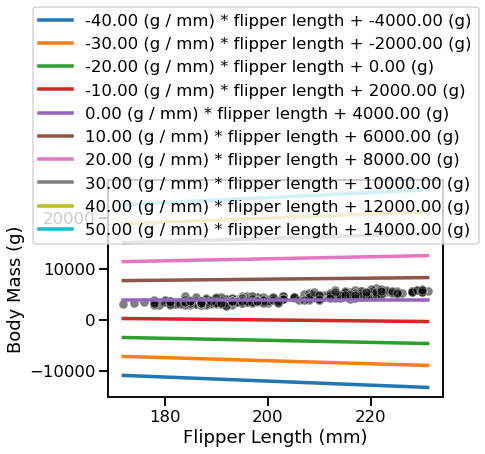

In [5]:
# Write your code here.
import matplotlib.pyplot as plt
import seaborn as sns

weights = [x for x in range(-40, 100, 10)]
intercepts = [x for x in range(-4000, 16000, 2000)]

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"
for weight, intercept in zip(weights, intercepts):
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept)

    ax.plot(flipper_length_range, predicted_body_mass,
            label=label.format(weight, intercept))
_ = ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)

In the previous question, you were asked to create several linear models.
The visualization allowed you to qualitatively assess if a model was better
than another.

Now, you should come up with a quantitative measure which indicates the
goodness of fit of each linear model and allows you to select the best model.
Define a function `goodness_fit_measure(true_values, predictions)` that takes
as inputs the true target values and the predictions and returns a single
scalar as output.

In [6]:
# Write your code here.
def goodness_fit_measure(true_values, predictions):
    # we compute the error between the true values and the predictions of our
    # model
    errors = np.ravel(true_values) - np.ravel(predictions)
    # We have several possible strategies to reduce all errors to a single value.
    # Computing the mean error (sum divided by the number of element) might seem
    # like a good solution. However, we have negative errors that will misleadingly
    # reduce the mean error. Therefore, we can either square each
    # error or take the absolute value: these metrics are known as mean
    # squared error (MSE) and mean absolute error (MAE). Let's use the MAE here
    # as an example.
    return np.mean(np.abs(errors))

You can now copy and paste the code below to show the goodness of fit for
each model.

```python
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")
```

In [7]:
# Write your code here.
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")

Model #0:
-40.00 (g / mm) * flipper length + -4000.00 (g)
Error: 16238.363

Model #1:
-30.00 (g / mm) * flipper length + -2000.00 (g)
Error: 12229.211

Model #2:
-20.00 (g / mm) * flipper length + 0.00 (g)
Error: 8220.058

Model #3:
-10.00 (g / mm) * flipper length + 2000.00 (g)
Error: 4210.906

Model #4:
0.00 (g / mm) * flipper length + 4000.00 (g)
Error: 666.667

Model #5:
10.00 (g / mm) * flipper length + 6000.00 (g)
Error: 3807.398

Model #6:
20.00 (g / mm) * flipper length + 8000.00 (g)
Error: 7816.550

Model #7:
30.00 (g / mm) * flipper length + 10000.00 (g)
Error: 11825.702

Model #8:
40.00 (g / mm) * flipper length + 12000.00 (g)
Error: 15834.854

Model #9:
50.00 (g / mm) * flipper length + 14000.00 (g)
Error: 19844.006

